# Parametric and non-parametric fitting and error estimation

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue May  3 11:39:50 2016

@author: elyar sedaghati
"""
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
%matplotlib inline
# Just some graph settings.
rcParams['figure.figsize'] = 10, 8
matplotlib.rc('font', family='serif')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

First we generate some data from a predetermined model, given as:

$f(x) = 3\cos(0.8x)+\frac{1}{2}x^{3/2}-2$

In [2]:
def f(x):
    return 3*np.cos(0.8*x) + 0.5 * x**(3/2) - 2.

np.random.seed(123)
N = 200
f_true = 1.5 #factor for introducing intrinsic scatter to the data, 0 = no scatter.
f_true_err = 1.0 #underestimation factor for individual error uncertainties.
xdata = np.sort(np.random.rand(N) * 10)
yvals_err = 0.5*np.abs(np.random.normal(0.,1.,N))*f_true_err
ydata = f(xdata)
ydata += yvals_err * np.random.randn(N) * f_true
x = np.arange(0,10,0.05) #for plotting purposes.

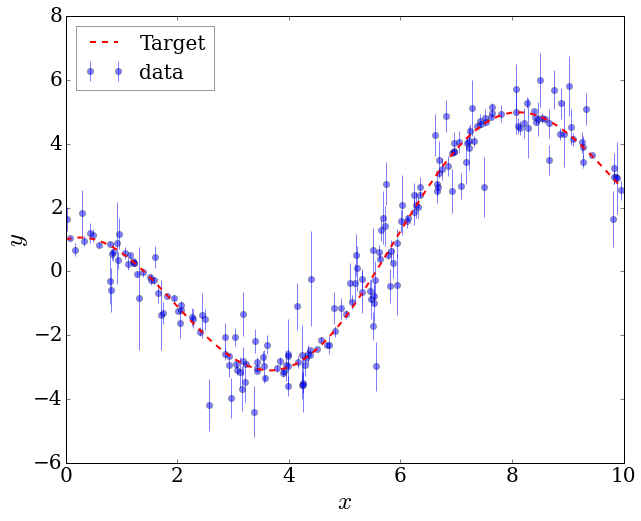

In [3]:
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,f(x), 'r--', label='Target',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

## Non-parametric regression approach

Python has a whole host of non-parametric methods.  Here we only look at smooth non-parametric regression using localised polynomials.

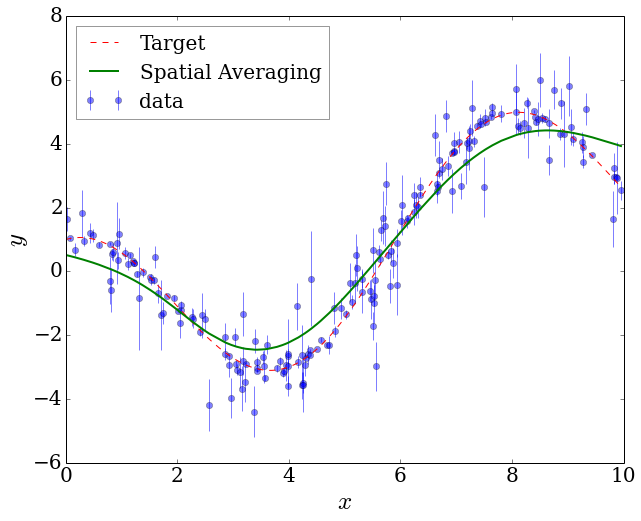

In [4]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
k0 = smooth.NonParamRegression(xdata, ydata, method=npr_methods.SpatialAverage())
k0.fit()

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,f(x), 'r--', label='Target')
ax.plot(xdata, k0(xdata), label="Spatial Averaging", linewidth=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

We can look at the residuals of the fit.

ResTestResult(res_figure=<matplotlib.figure.Figure object at 0x7f0b5307aa50>, residuals=(<matplotlib.lines.Line2D object at 0x7f0b538ca350>, [<matplotlib.lines.Line2D object at 0x7f0b5b60bd90>]), scaled_residuals=[<matplotlib.lines.Line2D object at 0x7f0b52fd8190>, <matplotlib.lines.Line2D object at 0x7f0b52fd8810>], qqplot=[<matplotlib.lines.Line2D object at 0x7f0b5b3e6590>, <matplotlib.lines.Line2D object at 0x7f0b5b3e67d0>], dist_residuals=((array([ 0.00928241,  0.01856481,  0.01856481,  0.09282407,  0.30631943,
        0.34344906,  0.48268517,  0.3991435 ,  0.1299537 ,  0.05569444]), array([-3.31515274, -2.77649935, -2.23784597, -1.69919258, -1.16053919,
       -0.6218858 , -0.08323241,  0.45542097,  0.99407436,  1.53272775,
        2.07138114]), <a list of 10 Patch objects>), [<matplotlib.lines.Line2D object at 0x7f0b5b37a290>]))

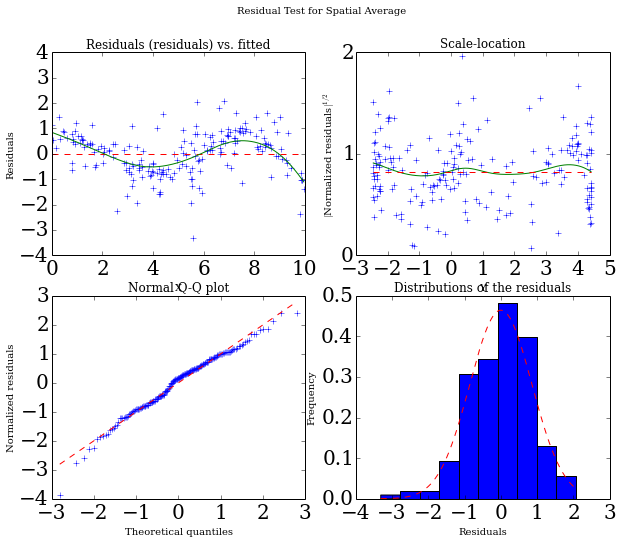

In [5]:
from pyqt_fit import plot_fit
yopts = k0(xdata)
res = ydata - yopts
plot_fit.plot_residual_tests(xdata, yopts, res, 'Spatial Average')

This clearly not a sufficient fit. Hence we increase the complexity of the polynomial.

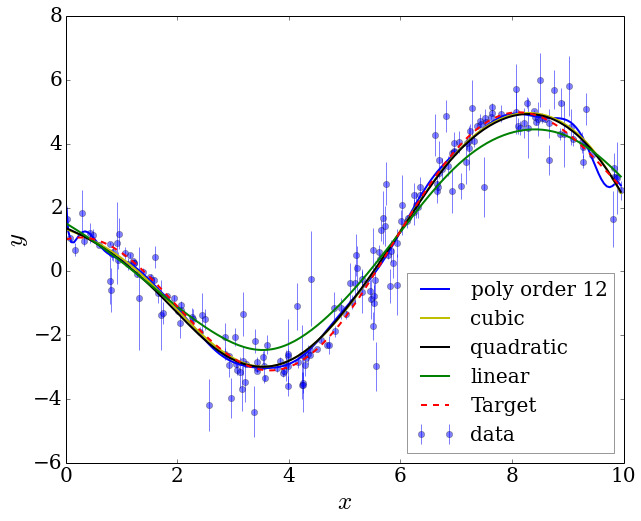

In [6]:
k1 = smooth.NonParamRegression(xdata, ydata, method=npr_methods.LocalPolynomialKernel(q=1))
k2 = smooth.NonParamRegression(xdata, ydata, method=npr_methods.LocalPolynomialKernel(q=2))
k3 = smooth.NonParamRegression(xdata, ydata, method=npr_methods.LocalPolynomialKernel(q=3))
k12 = smooth.NonParamRegression(xdata, ydata, method=npr_methods.LocalPolynomialKernel(q=12))
k1.fit(); k2.fit(); k3.fit(); k12.fit()
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x, k12(x), 'b', label='poly order 12', linewidth=2)
ax.plot(x, k3(x), 'y', label='cubic', linewidth=2)
ax.plot(x, k2(x), 'k', label='quadratic', linewidth=2)
ax.plot(x, k1(x), 'g', label='linear', linewidth=2)
ax.plot(x, f(x), 'r--', label='Target', linewidth=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

Again we should look at the residuals of the fit.

ResTestResult(res_figure=<matplotlib.figure.Figure object at 0x7f0b52fd8310>, residuals=(<matplotlib.lines.Line2D object at 0x7f0b5307a690>, [<matplotlib.lines.Line2D object at 0x7f0b530e5190>]), scaled_residuals=[<matplotlib.lines.Line2D object at 0x7f0b52dae850>, <matplotlib.lines.Line2D object at 0x7f0b52daeed0>], qqplot=[<matplotlib.lines.Line2D object at 0x7f0b52ceab50>, <matplotlib.lines.Line2D object at 0x7f0b52cead90>], dist_residuals=((array([ 0.00934494,  0.00934494,  0.02803481,  0.10279432,  0.30838296,
        0.37379753,  0.62611086,  0.28034815,  0.08410444,  0.04672469]), array([-3.25271323, -2.71766421, -2.1826152 , -1.64756618, -1.11251717,
       -0.57746815, -0.04241913,  0.49262988,  1.0276789 ,  1.56272791,
        2.09777693]), <a list of 10 Patch objects>), [<matplotlib.lines.Line2D object at 0x7f0b514a0850>]))

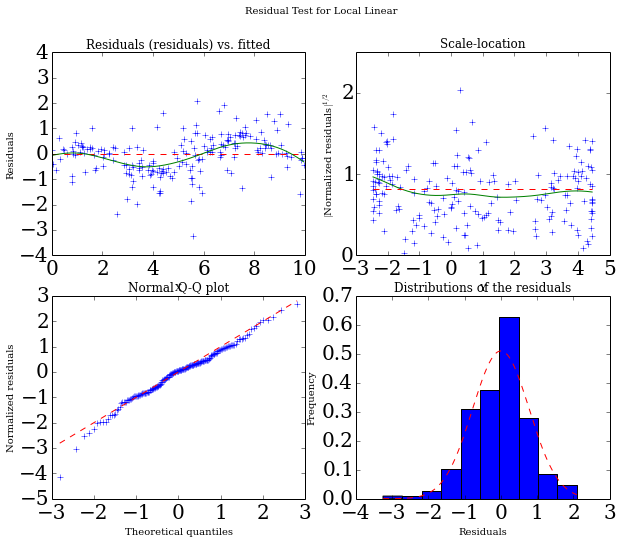

In [7]:
yopts = k1(xdata)
#yopts = k2(xdata) #uncomment for the quadratic fit.
#yopts = k3(xdata) #uncomment for the cubic fit.
#yopts = k12(xdata) #uncomment for the poly12 fit.
res = ydata - yopts
plot_fit.plot_residual_tests(xdata, yopts, res, 'Local Linear')
#plot_fit.plot_residual_tests(xdata, yopts, res, 'Local Quadratic')
#plot_fit.plot_residual_tests(xdata, yopts, res, 'Local Cubic')
#plot_fit.plot_residual_tests(xdata, yopts, res, 'Local Poly12')

Lets say that we decide (one way or another) that the best model is the local cubic fit.  In order to obtain the Confidence Intervals (CIs) of the fit we can bootstrap our data.  Here we use the bootstrap sub-routine in the pyqt_fit module, and later define the process explicitly.

Refer to http://pythonhosted.org/PyQt-Fit/mod_bootstrap.html for more details.

In [17]:
import pyqt_fit.bootstrap as bs

def fit(x, y):
  est = smooth.NonParamRegression(x, y, method=npr_methods.LocalPolynomialKernel(q=3))
  est.fit()
  return est
result = bs.bootstrap(fit, xdata, ydata, eval_points = xdata, repeats=500, CI = (68.27,95.45,99.73))

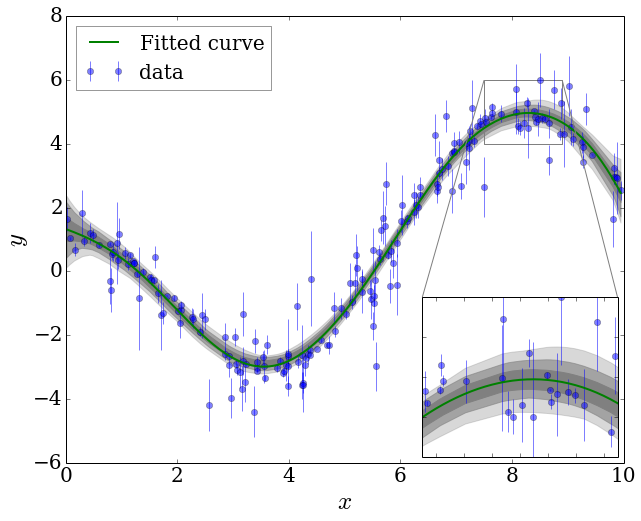

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
plt.plot(x, result.y_fit(x), 'g', label="Fitted curve", linewidth=2)
plt.fill_between(xdata, result.CIs[0][0,0], result.CIs[0][0,1], color='gray', alpha=1.00,label='1-$\sigma$')
plt.fill_between(xdata, result.CIs[0][1,0], result.CIs[0][1,1], color='gray', alpha=0.60,label='2-$\sigma$')
plt.fill_between(xdata, result.CIs[0][2,0], result.CIs[0][2,1], color='gray', alpha=0.30,label='3-$\sigma$')
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
axins = zoomed_inset_axes(ax, 2.5, loc=4)
axins.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
axins.fill_between(xdata, result.CIs[0][0,0], result.CIs[0][0,1], color='gray', alpha=1.00,label='1-$\sigma$')
axins.fill_between(xdata, result.CIs[0][1,0], result.CIs[0][1,1], color='gray', alpha=0.60,label='2-$\sigma$')
axins.fill_between(xdata, result.CIs[0][2,0], result.CIs[0][2,1], color='gray', alpha=0.30,label='3-$\sigma$')
axins.plot(x, result.y_fit(x), 'g', label="Fitted curve", linewidth=2)
x1, x2, y1, y2 = 7.5, 8.9, 4., 6. # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
plt.show()

## Non-parametric GP class (Gaussian Processes).

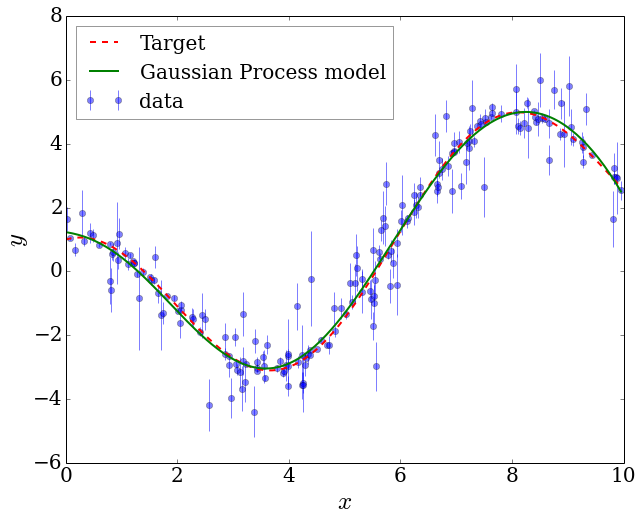

In [21]:
import sklearn
from sklearn.gaussian_process import GaussianProcess

X = np.atleast_2d(xdata).T
Y = np.atleast_2d(ydata).T
x_pred = np.atleast_2d(np.linspace(X.min(), X.max(),num=len(x))).T

gp = GaussianProcess(theta0=0.1, nugget=10e-8);
gp.fit(X, Y);

y_pred, mean_squared_error = gp.predict(x_pred, eval_MSE=True)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x, f(x), 'r--', label='Target', lw=2)
ax.plot(x_pred,y_pred,label='Gaussian Process model',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

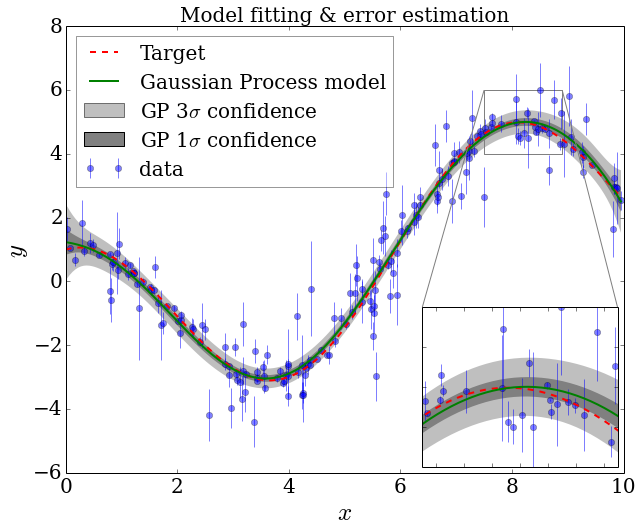

In [22]:
#Getting the uncertainties in the GP model.
sigma = np.sqrt(mean_squared_error)
confidence_interval_3 =  3 * sigma
confidence_interval_1 = 1 * sigma

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
plt.title('Model fitting & error estimation',fontsize=20)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x, f(x), 'r--', label='Target', lw=2)
ax.plot(x_pred,y_pred,label='Gaussian Process model',lw=2)
ax.fill(np.concatenate([x_pred, x_pred[::-1]]),np.concatenate([y_pred - confidence_interval_3, (y_pred + confidence_interval_3)[::-1]]),
 alpha=.5, fc='gray', ec='None', label='GP 3$\mathtt{\sigma}$ confidence')
ax.fill(np.concatenate([x_pred, x_pred[::-1]]),np.concatenate([y_pred - confidence_interval_1, (y_pred + confidence_interval_1)[::-1]]),
 alpha=1., fc='gray', ec='None', label='GP 1$\mathtt{\sigma}$ confidence')
ax.legend(loc=2, prop={'size':20}, frameon=True, framealpha=0.4)
axins = zoomed_inset_axes(ax, 2.5, loc=4)
axins.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
axins.plot(x, f(x), 'r--', label='Target', lw=2)
axins.plot(x_pred,y_pred,label='Gaussian Process model',lw=2)
axins.fill(np.concatenate([x_pred, x_pred[::-1]]),np.concatenate([y_pred - confidence_interval_3, (y_pred + confidence_interval_3)[::-1]]),
 alpha=.5, fc='gray', ec='None', label='GP 3$\mathtt{\sigma}$ confidence')
axins.fill(np.concatenate([x_pred, x_pred[::-1]]),np.concatenate([y_pred - confidence_interval_1, (y_pred + confidence_interval_1)[::-1]]),
 alpha=1., fc='gray', ec='None', label='GP 1$\mathtt{\sigma}$ confidence')
x1, x2, y1, y2 = 7.5, 8.9, 4., 6. # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
plt.show()

#Parametric regression methods

what if we have pre detremined model that we would like to impose upon data.

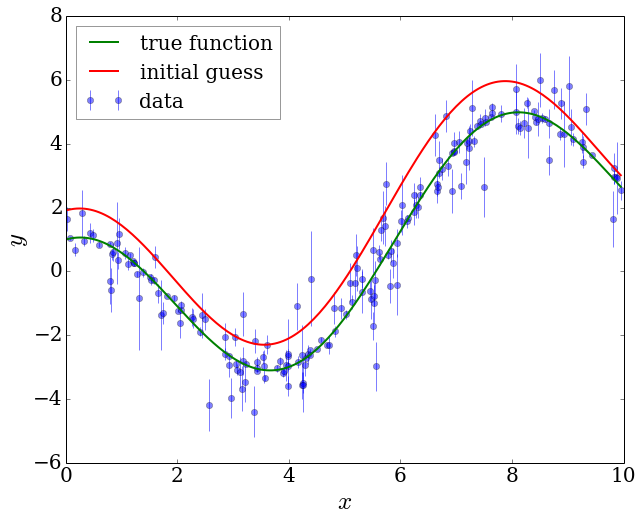

In [23]:
# first we parameterise our original function
def f_(x,a,b,c,d):
    return a * np.cos(b * x) + c * x**(3/2) + d

def ff(x, p):
    return f_(x, *p)

# The true parameters as before
a_ = 3.
b_ = 0.8
c_ = 0.5
d_ = -2.

# Create initial guesses for the parameters:
pstart = [a_ + np.random.random(),b_ + .1*np.random.random(),c_ + .1*np.random.random(),d_ + np.random.random()]

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', y=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,f_(x,a_,b_,c_,d_),label='true function',lw=2)
ax.plot(x,ff(x,pstart),label='initial guess',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

###Least squares fitting
+ Through minimisation of chi-square
+ Only if the noise is Gaussian, then this is the same as maximising the likelihood
```python
from scipy import optimize
```
+ Finding the parameters using curve_fit that uses non-linear least squares for fitting
    + curve_fit is just a wrapper for leastsq to make it more user-friendly.
    + uses a Levenburg-Marquardt gradient method (greedy algorithm) to minimise the objective function.

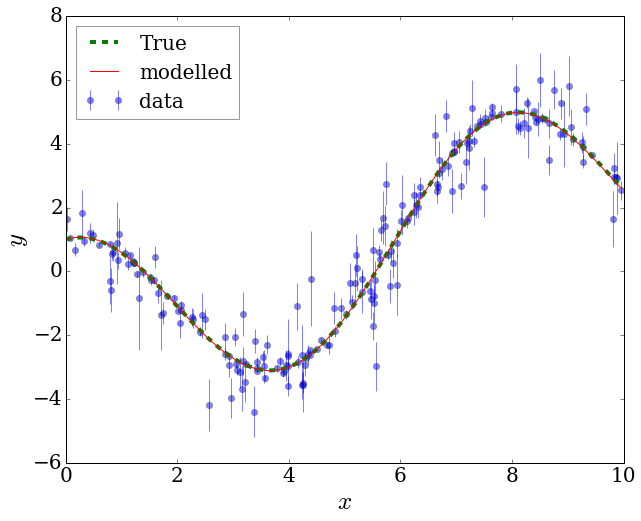

Fit parameters and parameter errors from curve_fit method :
Par fit [p0,p1,p2,p3] = 	[ 3.00338902  0.80070379  0.49835259 -1.99448213]
parameter errors +/-  = 	[ 0.00411128  0.00043098  0.00199254  0.00792733]
The target parameters = 	[3.0, 0.8, 0.5, -2.0]


In [32]:
from scipy import optimize
def fit_curvefit(function, datax, datay, p, yerr=yvals_err, **kwargs):

    pfit, pcov = \
         optimize.curve_fit(f_,datax,datay,p0=p,\
                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit 

pfit, perr = fit_curvefit(ff, xdata, ydata, pstart)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,f_(x,a_,b_,c_,d_),'--',label='True',lw=4)
ax.plot(x,f_(x,pfit[0],pfit[1],pfit[2],pfit[3]),label='modelled',lw=1)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()
print "Fit parameters and parameter errors from curve_fit method :"
print "Par fit [p0,p1,p2,p3] = \t", pfit
print "parameter errors +/-  = \t", perr
print "The target parameters = \t",[a_,b_,c_,d_]

We can also do this with the leastsq routine. (Essentially same as above)

leastsq again uses LM gradient method to minimise the score function.
+ Lack of robustness

Gradient methods such as Levenburg-Marquardt used by leastsq/curve_fit are greedy methods and simply run into the nearest local minimum.
+ The latest version of scipy has updated least squares fitting routine called least_squares which allows for selection of boundaries on the fitted parameters, as well as choosing which minimization algorithm to use (Trust Region Reflective, dogleg or LM algorithms).

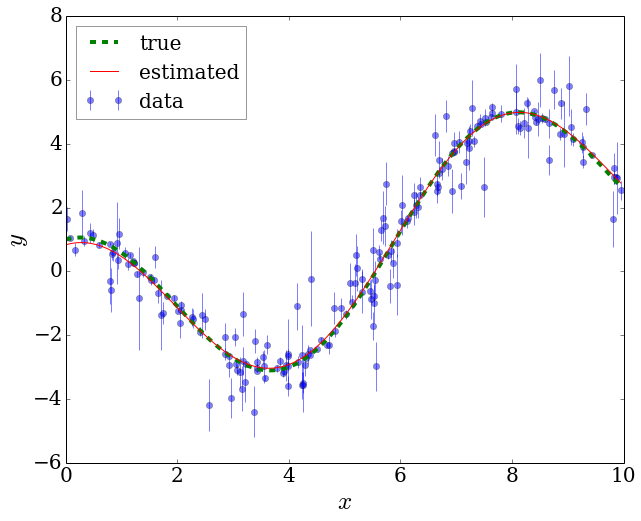

Fit paramters and parameter errors from lestsq method : 

Par fit [p0,p1,p2,p3] = 	[ 2.91921269  0.80009686  0.51986129 -2.08467342]
parameter errors +/- = 	 	[ 0.07186327  0.00409294  0.01908956  0.1068223 ]
The target parameters = 	[3.0, 0.8, 0.5, -2.0]


In [39]:
def fit_leastsq(p, datax, datay, function):

    errfunc = lambda p_, x, y: function(x,p_) - y

    pfit, pcov, infodict, errmsg, success = \
        optimize.leastsq(errfunc, p, args=(datax, datay), \
                          full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

pfit, perr = fit_leastsq(pstart, xdata, ydata, ff)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,f_(x,a_,b_,c_,d_),'--',label='true',lw=4)
ax.plot(x,f_(x,pfit[0],pfit[1],pfit[2],pfit[3]),label='estimated',lw=1)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()
print"Fit paramters and parameter errors from lestsq method : \n"
print"Par fit [p0,p1,p2,p3] = \t", pfit
print"parameter errors +/- = \t \t", perr
print "The target parameters = \t",[a_,b_,c_,d_]

###Estimating parameter uncertainty using bootstrap
Please note that the bootstrap procedure is done on the residuals keeping the sample size fixed (the same as the original sample) and resampling the error bars for each bootstrap step.  Here we explicitly write the bootstrap.

In [37]:
def fit_bootstrap(p, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p_, x, y: function(x,p_) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p, args=(datax, datay), full_output=0)

    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # choose a number of random data sets that are generated and fitted
    ps = []
    for i in range(1000):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta

        randomfit, randomcov = \
            optimize.leastsq(errfunc, p, args=(datax, randomdataY),\
                             full_output=0)

        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, xdata, ydata, ff)

print "Fit parameters and parameter errors from bootstrap method : \n"
print "Par fit [p0,p1,p2,p3] = \t", pfit
print "parameter errors +/- = \t \t", perr
print "The target parameters = \t",[a_,b_,c_,d_]
print "The parameter guesses = \t",pstart

Fit parameters and parameter errors from bootstrap method : 

Par fit [p0,p1,p2,p3] = 	[ 2.91951707  0.80010179  0.51985672 -2.08519238]
parameter errors +/- = 	 	[ 0.07230136  0.00418389  0.0194904   0.10721885]
The target parameters = 	[3.0, 0.8, 0.5, -2.0]
The parameter guesses = 	[3.0693419595408438, 0.8239195500917286, 0.5238277207424706, -1.1594209854568762]


The first two methods (curve_fit and leastsq) provide efficient ways in
estimating parameter uncertainty.  However, they cannot just be used freely
and they have to be closely looked at.  Boostrap on the other hand is a
purely statistical method that uses brute force and therefore more reliable.
You should always test results with a bootstrap and ONLY if they agree , then
other methods are recommended.

##MCMC -- what if I don't trust the error bars?

Reference: This section is based on the explnation presented in
http://dan.iel.fm/emcee/current/user/line/

The least squares solution found in the previous section is the maximum 
likelihood result for a model where the error bars are assumed correct, 
Gaussian and independent.

If you do not trust the error bars (which you shouldn't), instead, you 
need to write down the likelihood function and numerically optimize it.
This likelihood function is simply a Gaussian where the variance is 
underestimated by some fractional amount, f.

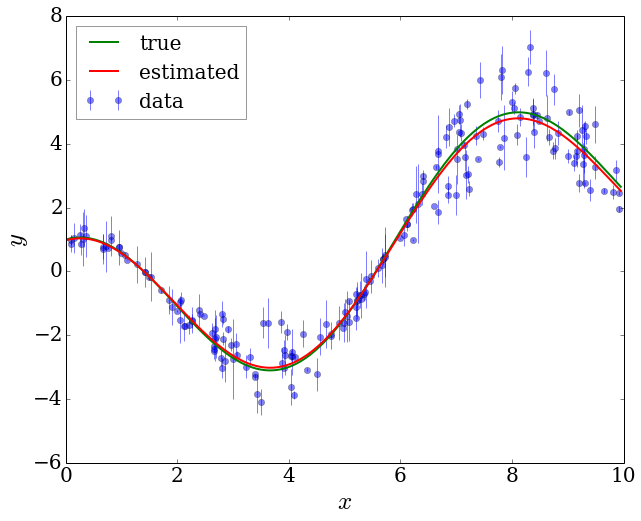

In [131]:
#re-introducing the data set
def f_(x,a,b,c,d):
    return a * np.cos(b * x) + c * x**(3/2) + d

def ff(x, p):
    return f_(x, *p)

# The true parameters as before
a_ = 3.; b_ = 0.8; c_ = 0.5; d_ = -2.
p_ = [a_,b_,c_,d_]

# Create initial guesses for the parameters:
pstart = [a_ + np.random.random(),b_ + .1*np.random.random(),c_ + .1*np.random.random(),d_ + np.random.random()]

N = 200
f_true = 0.2 #factor for introducing intrinsic scatter to the data, 0 = no scatter.
f_true_err = 1.0 #underestimation factor for individual error uncertainties.
xdata = np.sort(np.random.rand(N) * 10)
yvals_err = 0.5*np.abs(np.random.normal(0.,1.,N))*f_true_err
ydata = ff(xdata,p_)
ydata += np.abs(f_true*ydata) * np.random.randn(N) #Note the different way in which f_true is introduced.

from scipy import optimize

def lnlike(theta, x, y, yerr):
    a, b, c, d, lnf = theta
    model = f_(x,a,b,c,d)
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

nll = lambda *args: -lnlike(*args)
result = optimize.minimize(nll, [a_, b_, c_, d_, np.log(f_true)], \
        args=(xdata, ydata, yvals_err))
a_ml, b_ml, c_ml, d_ml, lnf_ml = result["x"]
"""
It’s worth noting that the optimize module minimizes functions whereas
we would like to maximize the likelihood. This goal is equivalent to 
minimizing the negative likelihood (or in this case, the negative log 
likelihood). 
"""
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
ax.plot(x,ff(x,p_),label='true',lw=2)
ax.plot(x,f_(x,a_ml,b_ml,c_ml,d_ml),label='estimated',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

To estimate the parameter uncertainties, we would like to propagate any
uncertainties in determination of f_true.  This is where MCMC comes in.

We want to marginalize over some “nuisance parameters” and find an estimate of 
the posterior probability function (the distribution of parameters that
is consistent with your dataset) for others. MCMC lets you do both of 
these things in one go.

Start by writing down the posterior prob. function, i.e.:

$$p(a,b,c,d,f_{true}|x,y,\sigma) \propto p(a,b,c,d,f_{true}) \times p(y|x,\sigma,a,b,c,d,f_{true})$$

Namely: posterior prob. = prior * likelihood

where the likelihood function is given by:

$$\ln p(y|x,\sigma,a,b,c,d,f_{true}) = -\frac{1}{2} \sum_{n}\left[\frac{(y_n - f(x_n))^2}{s_n^2} + \ln (2\pi s_n^2)\right]$$

with:

$$ s_n^2 = \sigma_n^2 + f_{true}^2 f(x_n)^2$$

We need to write down priors if we’re going to use MCMC because all 
that MCMC does is draw samples from a probability distribution and we 
want that to be a probability distribution for our parameters.

Here I will use uniform, also called non-informative or flat, priors on
all the parameters.

In [132]:
def lnprior(theta):
    a, b, c, d, lnf = theta
    if 0.0 < a < 5.0 and 0.0 < b < 1.0 and 0.4 < c < 0.6 and -3.0 < d < -1.0 and -15.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

"""
It is now easy to sample this distribution using emcee. We’ll start 
by initializing the walkers in a tiny Gaussian ball around the maximum 
likelihood result:
"""

ndim, nwalkers = 5, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

#and now the sampler
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, yvals_err))

#run MCMC for 500 steps
print "Running MCMC..."
sampler.run_mcmc(pos, 500, rstate0=np.random.get_state())
print "Done."

Running MCMC...
Done.


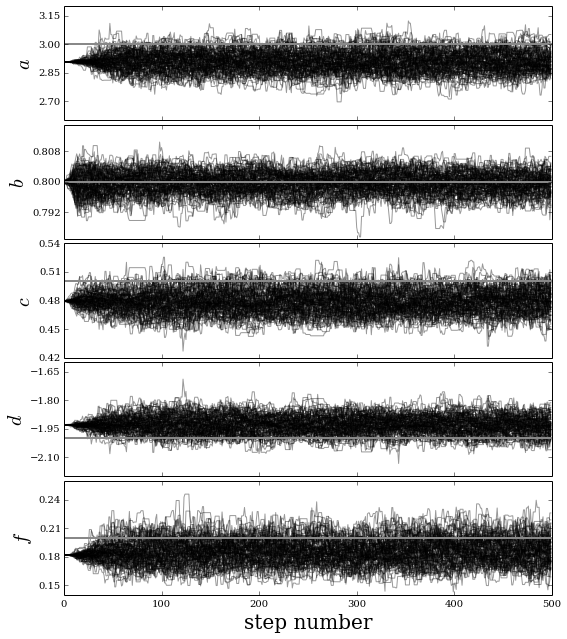

In [133]:
#now we can look at the parameter evolution in the chain
from matplotlib.ticker import MaxNLocator

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.clf()
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 9))
for i in range(5):
    axes[i].yaxis.label.set_size(20)
axes[0].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].axhline(a_, color="#888888", lw=2)
axes[0].set_ylabel("$a$")

axes[1].plot(sampler.chain[:, :, 1].T, color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].axhline(b_, color="#888888", lw=2)
axes[1].set_ylabel("$b$")

axes[2].plot(sampler.chain[:, :, 2].T, color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].axhline(c_, color="#888888", lw=2)
axes[2].set_ylabel("$c$")

axes[3].plot(sampler.chain[:, :, 3].T, color="k", alpha=0.4)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].axhline(d_, color="#888888", lw=2)
axes[3].set_ylabel("$d$")

axes[4].plot(np.exp(sampler.chain[:, :, 4]).T, color="k", alpha=0.4)
axes[4].yaxis.set_major_locator(MaxNLocator(5))
axes[4].axhline(f_true, color="#888888", lw=2)
axes[4].set_ylabel("$f$")
axes[4].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
#fig.savefig("line-time.pdf")
plt.show()

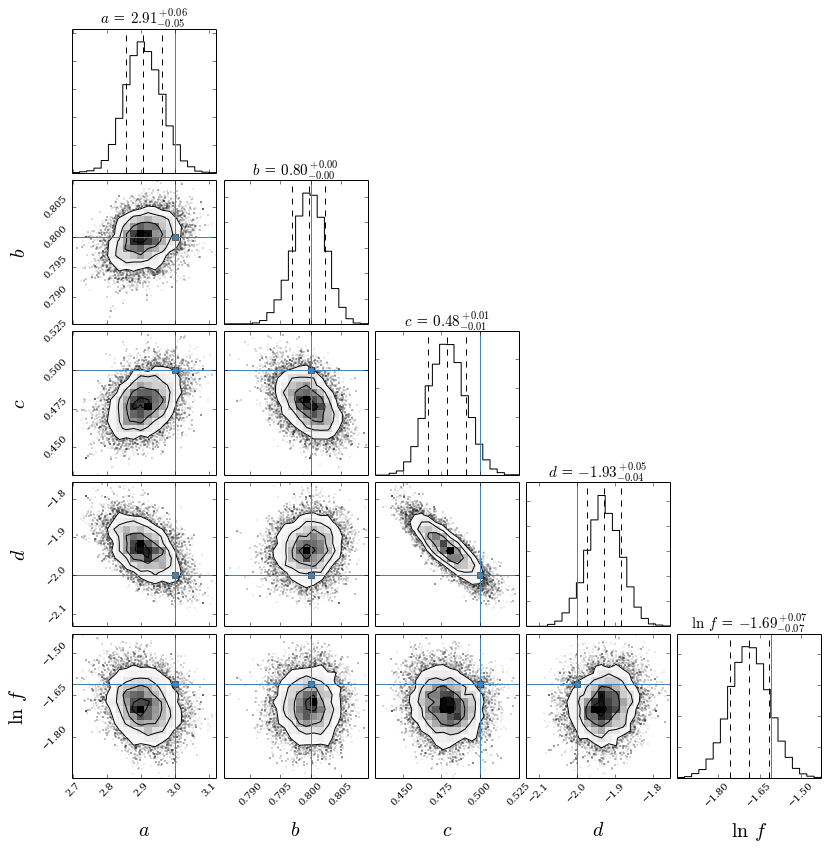

In [134]:
"""
The walkers started in small distributions around the maximum likelihood values 
and then they quickly wander and start exploring the full posterior distribution. 
In fact, after fewer than 200 steps, the samples seem pretty well “burnt-in”. 
Quantitative assesment here is not so trivial, so for now we just accept this 
value and discard the initial 200 steps and flatten the chain so that we have a 
flat list of samples.
"""

samples = sampler.chain[:, 200:, :].reshape((-1, ndim))

import corner
plt.rcParams['axes.labelsize'] = 20
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$", "$d$", "$\ln\,f$"],
                    quantiles=[0.16, 0.5, 0.84],
                    truths=[a_, b_, c_, d_, np.log(f_true)],
                    show_titles=True, title_kwargs={"fontsize": 15})

#fig.savefig("posterior.pdf")

The correlations plot shows all the one and two dimensional projections of the 
posterior probability distributions of the parameters. This is useful because 
it quickly demonstrates all of the covariances between parameters. Also, the way 
that we find the marginalized distribution for a parameter or set of parameters 
using the results of the MCMC chain is to project the samples into that plane 
and then make an N-dimensional histogram. That means that the correlation plot 
shows the marginalized distribution for each parameter independently in the 
histograms along the diagonal and then the marginalized two dimensional 
distributions in the other panels.

We also would like to see the projection of the results onto the space of the
observed data. To do this we choose a few samples from the chain:

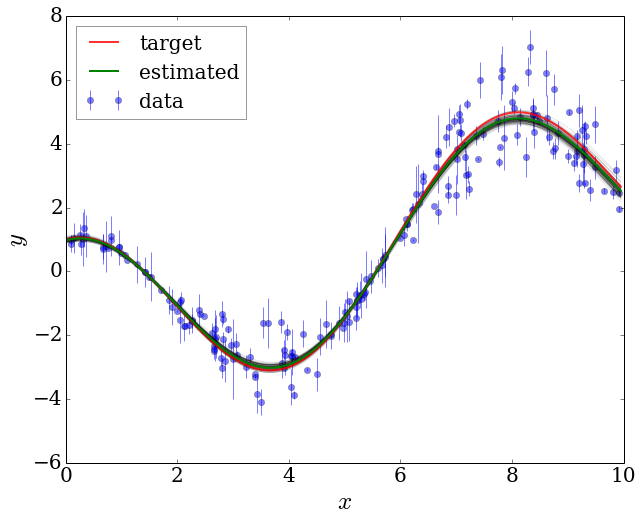

MCMC result:
    a = 2.90640791297 +0.0554507071184 -0.0515949755971 (truth: 3.0)
    b = 0.799777628473 +0.00265718880864 -0.00278742808959 (truth: 0.8)
    c = 1.6136688611 +0.0198391138749 -0.0191274812747 (truth: 0.5)
    d = -1.93032579941 +0.0462687467435 -0.0439919636795 (truth: -2.0)
    f = 0.18509374076 +0.0138138595348 -0.01253624128 (truth: 0.2)



In [135]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata, ydata, yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='data')
for a, b, c, d, lnf in samples[np.random.randint(len(samples), size=100)]:
    ax.plot(x, f_(x,a,b,c,d), color="k", alpha=0.1)
ax.plot(x, f_(x,a_,b_,c_,d_), color="r", lw=2, alpha=0.8, label='target')
ax.plot(x,f_(x,a_ml,b_ml,c_ml,d_ml),label='estimated',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
#plt.savefig('MCMC_solutions.pdf', fmt='pdf', bbox_inches='tight', dpi=1000)
plt.show()

"""
And finally to estimation of uncertainties:
we can quote the uncertainties based on the 16th, 50th, and 84th percentiles of 
the samples in the marginalized distributions.
"""
samples[:, 2] = np.exp(samples[:, 2])
a_mcmc, b_mcmc, c_mcmc, d_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

print("""MCMC result:
    a = {0[0]} +{0[1]} -{0[2]} (truth: {1})
    b = {2[0]} +{2[1]} -{2[2]} (truth: {3})
    c = {4[0]} +{4[1]} -{4[2]} (truth: {5})
    d = {6[0]} +{6[1]} -{6[2]} (truth: {7})
    f = {8[0]} +{8[1]} -{8[2]} (truth: {9})
""".format(a_mcmc, a_, b_mcmc, b_, c_mcmc, c_, d_mcmc, d_,
           [np.exp(f_mcmc[0]),np.exp(f_mcmc[0]+f_mcmc[1]) - np.exp(f_mcmc[0]),np.abs(np.exp(f_mcmc[0]-f_mcmc[2]) - 
            np.exp(f_mcmc[0]))], f_true))